# Import libraries and create samples.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# We determine the possible directions of movement
directions = {
    0: 'Left and up',
    1: 'Above',
    2: 'To the left at a constant height',
    3: 'To the left at a constant height',
    4: 'Left and down',
    5: 'Below',
    6: 'Right and up',
    7: 'To the right at a constant height',
    8: 'Right and down'
}

# Let's create training and test samples
# Suppose we have some inputs X_train and X_test that characterize the state of the aircraft
# In this example, we use random data for illustration
X_train = np.random.rand(1000, 10)  # 1000 examples, each with 10 features
y_train = np.random.randint(0, 9, 1000)  # 1000 target values ​​(directions of movement)

X_test = np.random.rand(200, 10)  # 200 examples for testing
y_test = np.random.randint(0, 9, 200)  # 200 target values ​​for testing

# We convert target values ​​into one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=9)
y_test = keras.utils.to_categorical(y_test, num_classes=9)


Construction of a neural network model, its training and testing. Let's start with a simple architecture with one hidden layer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                352       
                                                                 
 dense_1 (Dense)             (None, 9)                 297       
                                                                 
Total params: 649 (2.54 KB)
Trainable params: 649 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
32/32 [==============================] - 2s 20ms/step - loss: 2.2247 - accuracy: 0.1190 - val_loss: 2.2218 - val_accuracy: 0.1100
Epoch 2/20
32/32 [==============================] - 0s 7ms/step - loss: 2.2039 - accuracy: 0.1220 - val_loss: 2.2200 - val_accuracy: 0.1050
Epoch 3/20
32/32 [==============================] - 0s 9ms/step - loss: 2.1973 - accuracy: 0.1240 - val_loss: 2.2193 - val_accuracy: 0.1150
E

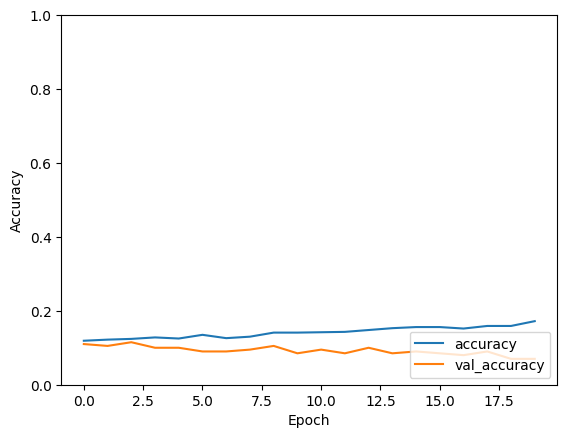

In [ ]:
def create_model(hidden_layers, hidden_units):
    model = keras.Sequential()
    model.add(layers.Input(shape=(10,)))  # Input layer
    for _ in range(hidden_layers):
        model.add(layers.Dense(hidden_units, activation='relu'))
    model.add(layers.Dense(9, activation='softmax'))  # The starting layer for 9th grade

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Let's create a model with 1 hidden layer and 32 neurons
model = create_model(hidden_layers=1, hidden_units=32)
model.summary()

# We train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Assessment of model performance
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# Visualization of learning results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Now we can try different neural network configurations and compare the results.

In [ ]:
# A function for testing different configurations.
def experiment(hidden_layers_list, hidden_units_list):
    results = {}
    for hidden_layers in hidden_layers_list:
        for hidden_units in hidden_units_list:
            model = create_model(hidden_layers, hidden_units)
            model.fit(X_train, y_train, epochs=20, verbose=0)
            test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
            results[(hidden_layers, hidden_units)] = test_acc
            print(f"Layers: {hidden_layers}, Units: {hidden_units}, Test Accuracy: {test_acc}")
    return results

hidden_layers_list = [1, 2, 3]
hidden_units_list = [32, 64, 128]
results = experiment(hidden_layers_list, hidden_units_list)

Layers: 1, Units: 32, Test Accuracy: 0.10999999940395355
Layers: 1, Units: 64, Test Accuracy: 0.12999999523162842
Layers: 1, Units: 128, Test Accuracy: 0.0949999988079071
Layers: 2, Units: 32, Test Accuracy: 0.10499999672174454
Layers: 2, Units: 64, Test Accuracy: 0.09000000357627869
Layers: 2, Units: 128, Test Accuracy: 0.07500000298023224
Layers: 3, Units: 32, Test Accuracy: 0.10999999940395355
Layers: 3, Units: 64, Test Accuracy: 0.11500000208616257
Layers: 3, Units: 128, Test Accuracy: 0.06499999761581421


Conclusions
- Changing the number of hidden layers and neurons affects the performance of the model.
- Increasing the number of layers and neurons can improve accuracy, but also increases training time and the risk of overtraining.
- The best configuration depends on the specific task and amount of data.